# Global Food Production

---

<img src="notebook_imgs/pop_graph.jpg" width='400px'/>
<figcaption><center><i>Projected world population growth (6).</i></center></figcaption>
    
---

### Introduction

The current world population is nearly 7.8 billion people, and this number is estimated to rise to around 9.7 billion in the year 2050. This means within the next 30 years, we will need to feed two billion more people without sacrificing the planet
(1). This means we will need to double our crop production in order to feed that growing population. Agriculture is one of the greatest contributors of global warming, with farming consuming immense amounts of our water supplies and leaving major pollutants as its byproduct from fertilizer runoff (4). So how do we increase food supply without destroying our environment?
    
With a continuously growing population this leads to the question, how do we supply the necessary amount of food for an increasing world population without sacrificing the climate of our planet? There are many solutions to this question, but the focus of this notebook will be on analyzing the global production of consumables, as well as the ratio of food (human consumption) to feed (livestock consumption) produced by each country. Only 55% of the current world crop production is consumed by humans, with the remaining being fed to livestock. On top of this, nearly 25% of the world’s food calories are wasted before they can be consumed (4).
    
Exploring the most produced food items as well as their use case will allow us to understand where a majority of our food is being directed, and whether or not a shift in diet could lead to more crops being used for food instead of feed. Global population trends will also be explored in this notebook, analyzing the change in global population compared to crop production. We will also see if top producing countries have the fastest growing populations over the last 50 years.

---

### Data
- `FAO_FOOD_STAT` is a Food Balance Sheet obtained through [Kaggle](https://www.kaggle.com/dorbicycle/world-foodfeed-production) that originated from [FAO](http://www.fao.org/faostat/en/#data/FBSH) but has been reformatted for easy of use. It contains the yearly food production of 115 food items for 174 countries, spanning from 1961 to 2013. It also is broken down into food and feed categories, which represent human and livestock consumables (respectively).
- `FAO_POP` is an Annual Population Report obtained through [FAO](http://www.fao.org/faostat/en/#data/OA) that contains the estimated population for 245 countries from 1961 to 2018. An important note is that this dataset contains 71 more countries than the first dataset, but will be kept in for total population purposes. We will drop the 5 extra years for this notebook, but in modeling we will keep years 2013-2018 for prediction purposes.

---

<center><i> A python module was used to save room in the notebook, see <b>functions.py</b> for function definitions. </i></center>

---
    
### Notebook Outline
    
1) [Import Modules and Data Prep](#section1)
- Import necessary libraries for data exploration tasks.
- Load in `FAO_FOOD_STAT` and `FAO_POP` datasets, as well as displaying the header for both.
- Drop all unnecessary columns and fill any missing values that need to be handled.
   
2) [Reformatting Population Data](#section2)
- We will want to reformat the population dataset so it is similar to the production dataset.
- Turn year from a single column, to multiple columns for each year.
- **2.1**: Explain why we dropped China (general area) from the dataframe.

3) [Production Exploration](#section3)
- **3.1**: Plot and interpret the top producing countries, both in total and yearly.
- **3.2**: Plot and interpret the top produced items, by both quanitity and occurance count.
- **3.3**: Explore product use case to compare production amounts for each. Use food/feed to find top producing countries and the top items for each.

4) [Population Exploration](#section4)
- **4.1**: Plot yearly population against yearly production, is there a linear relationship?
- **4.2**: Explore population of top producing countries, compared to their production amount.

5) [Russian Federation](#section5)
- *To be filled in...*

6) [Insights](#section6)
- *To be filled in...*

<a id='section1'></a>

## 1. Import Modules and Data

In [1]:
# import general libraries for data exploration and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import python module for graphing and data manipulation
from functions import *

# set style parameters for graphs
sns.set_style("darkgrid", {'axes.edgecolor': 'black'})
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.fontsize"] = 13

In [2]:
data = pd.read_csv('FAO_FOOD_STAT.csv')
pop = pd.read_csv('FAO_POP.csv')

In [3]:
data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
# drop columns that will not be used in exploration
data.drop(['Item Code', 'Area Code', 'Element Code', 'latitude', 'longitude'], axis=1, inplace=True)

data.head()

,Area Abbreviation,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [5]:
pop.head()

,Domain,Area,Element,Item,Year,Unit,Value,Note
0,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1961,1000 persons,9169.410,NaN
1,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1962,1000 persons,9351.441,NaN
2,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1963,1000 persons,9543.205,NaN
3,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1964,1000 persons,9744.781,NaN
4,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1965,1000 persons,9956.320,NaN


In [6]:
# drop columns that will not be used in exploration
pop.drop(['Domain','Element', 'Item', 'Note'], axis=1, inplace=True)

pop.head()

,Area,Year,Unit,Value
0,Afghanistan,1961,1000 persons,9169.410
1,Afghanistan,1962,1000 persons,9351.441
2,Afghanistan,1963,1000 persons,9543.205
3,Afghanistan,1964,1000 persons,9744.781
4,Afghanistan,1965,1000 persons,9956.320


<a id='section2'></a>

## 2. Reformatting Population Data

We want to reformat the population data in a way that resembles the production dataset so it will be easier to graph. To do this, we will turn the `Year` column into `Y1961` ... `Y2013` for each country. We will also drop years 2013 to 2018 to be consistent when graphing, and to not have any issues with the population being longer than the production years.

In [7]:
# Create filename to save the reforamtted data to
new_csv ='FAO_POP_REFORMAT.csv'

In [8]:
# Use population formatting function to alter the population data

format_population_data(pop, new_csv)

In [8]:
# Read in reformatted data and overwrite original population data
pop = pd.read_csv(new_csv)

pop.head() # new formatted data

,Area,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,1000 persons,9169.410,9351.441,9543.205,9744.781,9956.320,10174.836,10399.926,10637.063,...,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589
1,Albania,1000 persons,1685.936,1737.686,1790.573,1843.634,1896.171,1947.830,1998.740,2049.210,...,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790
2,Algeria,1000 persons,11336.339,11619.828,11912.803,12221.675,12550.885,12902.627,13275.026,13663.583,...,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133
3,American Samoa,1000 persons,20.602,21.253,22.034,22.854,23.672,24.462,25.248,25.989,...,59.681,59.562,59.107,58.365,57.492,56.683,56.079,55.759,55.667,55.713
4,Andorra,1000 persons,14.375,15.370,16.412,17.469,18.549,19.647,20.758,21.890,...,76.244,78.867,80.993,82.684,83.862,84.463,84.449,83.747,82.427,80.774


### 2.1 Dropping China from Population

The Area labeled `China` contained a popualtion of 1422971.062 persons (in 1000s) for 2013, but was dropped since the country is broken down into regions. Analyzing this, I saw that the population for `China` was the sum of all the regions that were also included, so I decided to drop the general China observation to avoid double counting the population. China is also not included in the Food Balance Dataset, but all of the regions were so that is another factor for dropping the general country yearly population.

Below shows the original population dataset that contained `China`, as well as the new data that only includes the regions. The 2013 populations are displayed, showing they are the same and account for the total population of China when the regions are summed.

In [9]:
old_pop = pd.read_csv('FAO_CHINA_OLD.csv')
china_pop = old_pop[old_pop.Area == 'China']['Y2013'].values[0]
print(f'China Population 2013: {china_pop} persons (in 1000s)')
old_pop

China Population 2013: 1422971.062 persons (in 1000s)


,Area,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,China,1000 persons,685523.498,697164.518,709900.098,724319.900,740790.571,759495.967,780172.786,802167.626,...,1352871.028,1360734.525,1368528.374,1376265.629,1383985.631,1391725.007,1399502.716,1407323.826,1415164.184,1422971.062
1,"China, Hong Kong SAR",1000 persons,3142.571,3230.299,3311.458,3389.558,3467.220,3545.855,3624.980,3703.171,...,6744.566,6769.574,6802.080,6840.015,6881.863,6924.642,6966.331,7006.590,7046.848,7088.778
2,"China, Macao SAR",1000 persons,170.462,176.183,184.245,193.561,203.228,213.192,223.418,233.000,...,471.597,482.858,493.799,504.511,515.239,526.400,538.219,550.832,564.039,577.372
3,"China, mainland",1000 persons,670952.695,682102.655,694339.083,708254.597,724218.968,742414.885,762581.176,784074.709,...,1323084.641,1330776.380,1338408.647,1345993.888,1353569.484,1361169.419,1368810.615,1376497.639,1384206.401,1391883.330
4,"China, Taiwan Province of",1000 persons,11257.770,11655.381,12065.312,12482.184,12901.155,13322.035,13743.212,14156.746,...,22570.224,22705.713,22823.848,22927.215,23019.045,23104.546,23187.551,23268.765,23346.896,23421.582


In [10]:
china_regions_pop = pop[pop.Area.str.contains('China')]['Y2013'].values.sum()
print(f'Summed China Regions Population 2013: {china_regions_pop} persons (in 1000s)')
pop[pop.Area.str.contains('China')]

Summed China Regions Population 2013: 1422971.062 persons (in 1000s)


,Area,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
44,"China, Hong Kong SAR",1000 persons,3142.571,3230.299,3311.458,3389.558,3467.220,3545.855,3624.980,3703.171,...,6744.566,6769.574,6802.080,6840.015,6881.863,6924.642,6966.331,7006.590,7046.848,7088.778
45,"China, Macao SAR",1000 persons,170.462,176.183,184.245,193.561,203.228,213.192,223.418,233.000,...,471.597,482.858,493.799,504.511,515.239,526.400,538.219,550.832,564.039,577.372
46,"China, mainland",1000 persons,670952.695,682102.655,694339.083,708254.597,724218.968,742414.885,762581.176,784074.709,...,1323084.641,1330776.380,1338408.647,1345993.888,1353569.484,1361169.419,1368810.615,1376497.639,1384206.401,1391883.330
47,"China, Taiwan Province of",1000 persons,11257.770,11655.381,12065.312,12482.184,12901.155,13322.035,13743.212,14156.746,...,22570.224,22705.713,22823.848,22927.215,23019.045,23104.546,23187.551,23268.765,23346.896,23421.582


<a id='section3'></a>

## 3. Production Exploration

### 3.1: Top 20 producing countries (summed from 1961 to 2013)

We will want to plot the top 20 producing countries in total production from 1961 to 2013, as well as the yearly production for the top 3 countries. This will allow us to see which countries produced the most over the past 50 years, as well as any trends in the production amount.

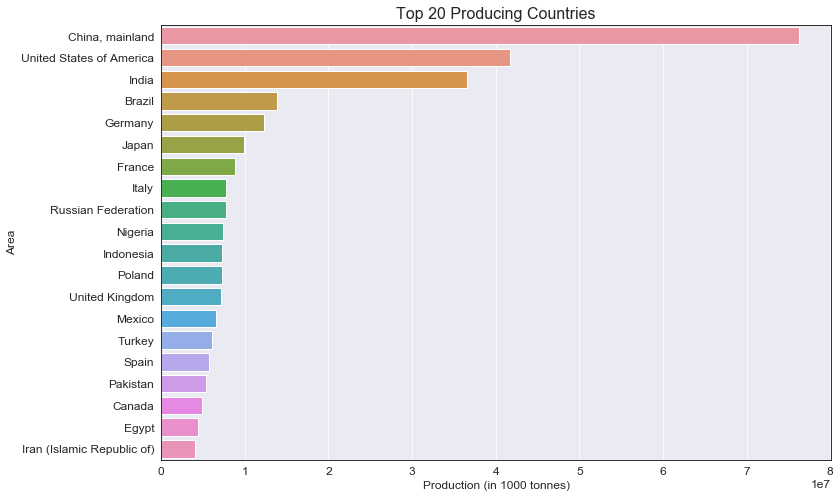

In [11]:
# Create new column that sums across each row to get total production
data['TotalProd'] = data.iloc[:, 5: ].sum(axis=1)

# Plot top 20 countries
plot_top_20_countries(data)

**Results**: *Add interpretation here...*


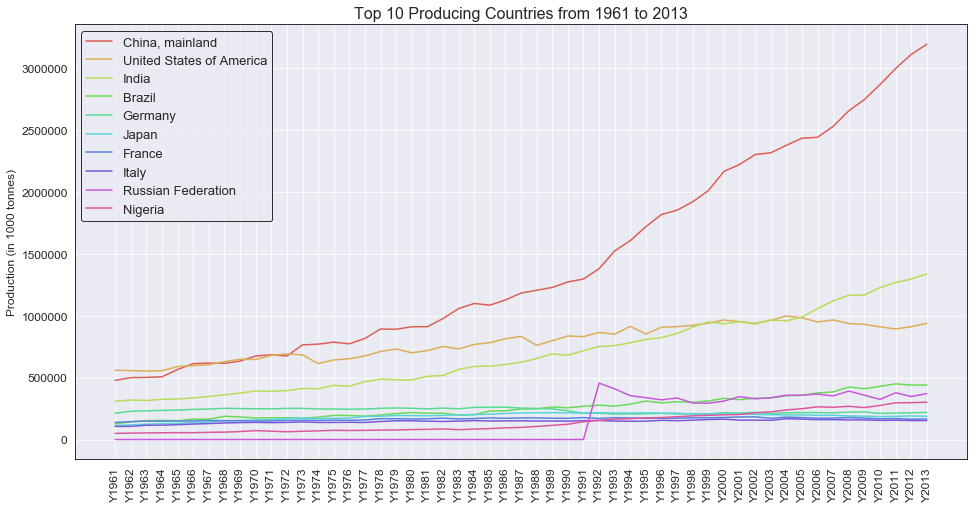

In [12]:
# Plot yearly production for top 3 countries from 1961 to 2013
plot_yearly_country(data)

**Results**: *Add interpretation here...*

Later, explore the Russian Federation and the spike that occured from 1991 to 1992.

### 3.2: Top 20 produced food items (summed from 1961 to 2013)

Now that we've seen the countries that have produced the most over the last 50 years, as well as the yearly production for the top 3, we want to see what exactly is being produced. First, we will visualize the top 20 produced food items globally, regardless of their use case. Then, we will want to split the current data into two new dataframes, partitioned by the `Element` column (food/feed). The dataset describes this as:

- `Food` - refers to the total amount of the food item available as human food during the reference period.
- `Feed` - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period. 

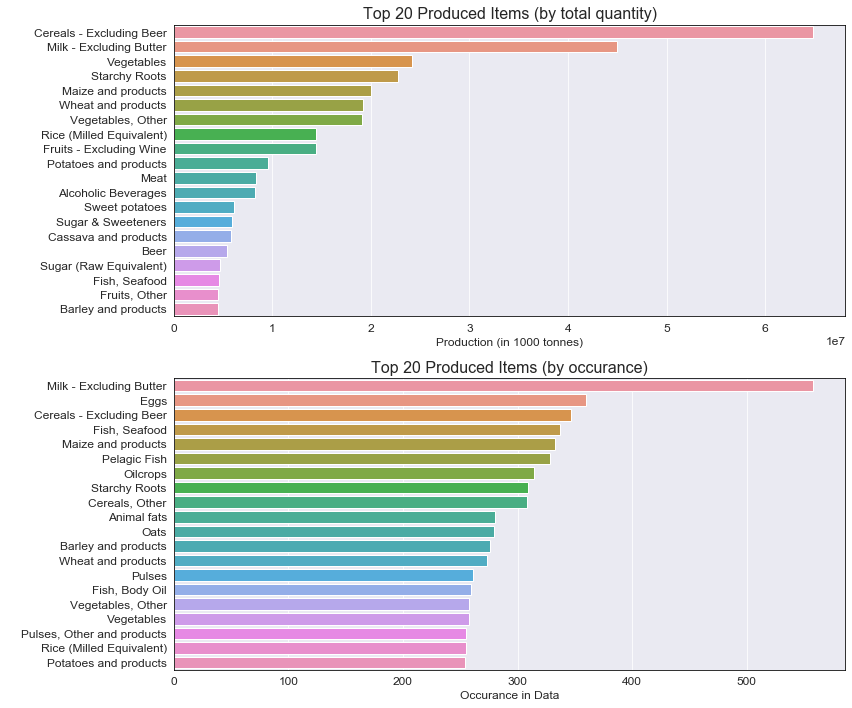

In [13]:
# Plot top 20 food items by quantity and by occurance in dataset
plot_top_20_food(data)

**Results**: *Add interpretation here...*

### 3.3 Product use case exploration (Feed vs Food)

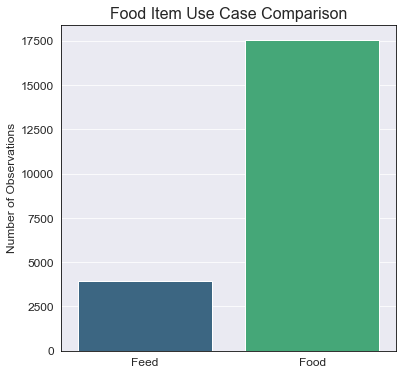

In [14]:
# Create a copy, and split the dataframe into 2
split_df = data.copy()

feed = split_df[split_df.Element == 'Feed']
food = split_df[split_df.Element == 'Food']

# Plot class distribution
plt.figure(figsize=(6,6))
sns.barplot(x=['Feed', 'Food'], y=[len(feed), len(food)], palette='viridis')
plt.title('Food Item Use Case Comparison')
plt.ylabel('Number of Observations')
plt.show();

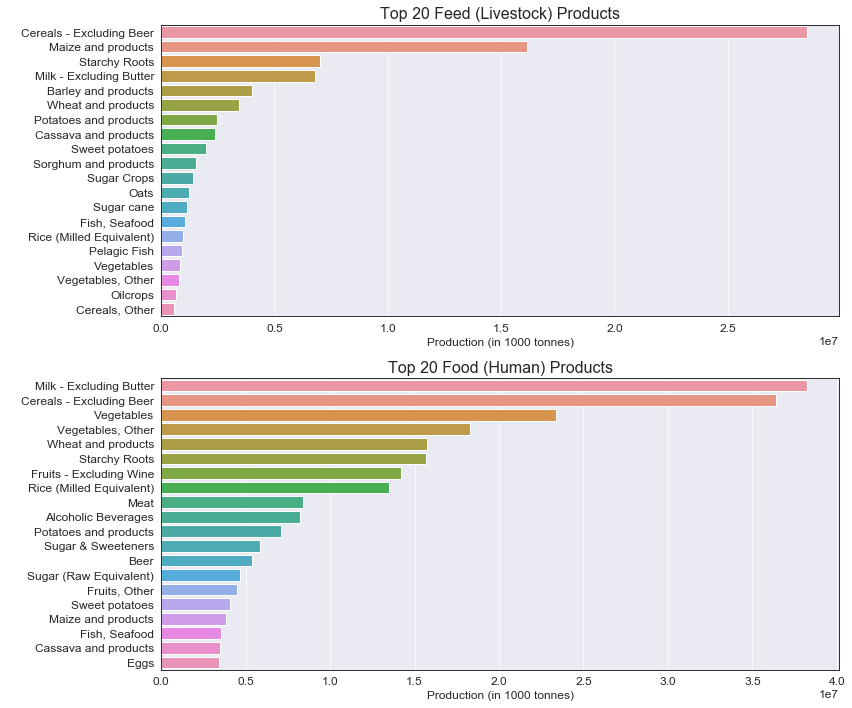

In [15]:
# Plot top 20 food and feed products
top_20_feed_food(feed, food)

**Results**: *Add interpretation here...*

### 3.2.1 Analyzing the Top Feed Products

With a majority of the feed item products being focused in `Cereals - Excluding Beer` and `Maize and products`, we want to analyze this further and see which country is responsible for this product, as well as the yearly trend for the top 10 feed items. This will allow us to see any yearly trends, as well as which feed item has been dominant over the last 50 years. 

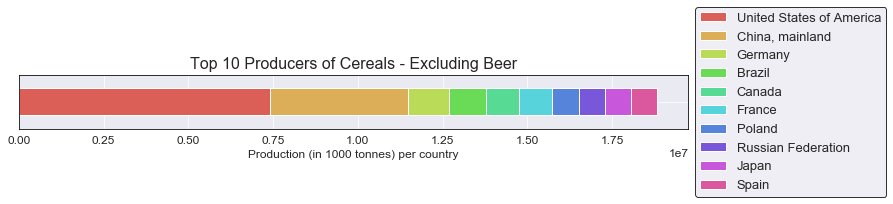

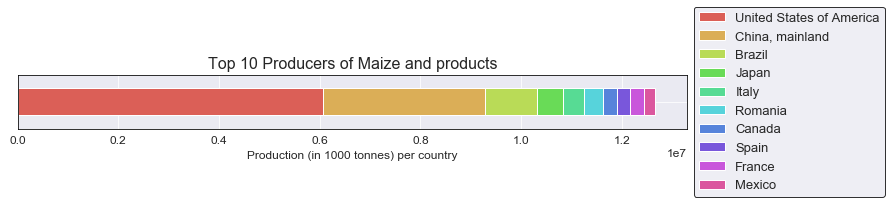

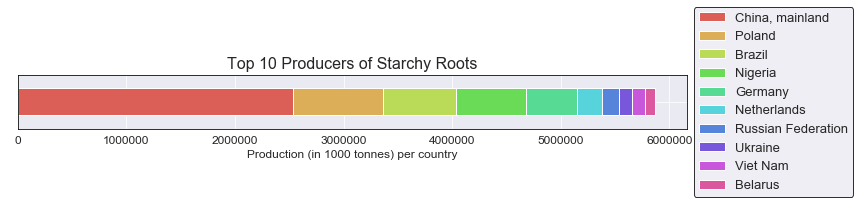

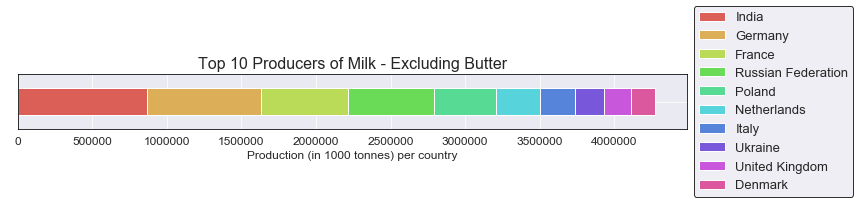

In [16]:
# Plot top 2 feed products, partitioned by the top 10 countries
# Note: since only top 10 countries are included, the total production will 
#       be slightly lower than the above graphs. This is assuming that the 
#       top 10 countries will be responsible for most of the global production.

top_10_producers(feed)

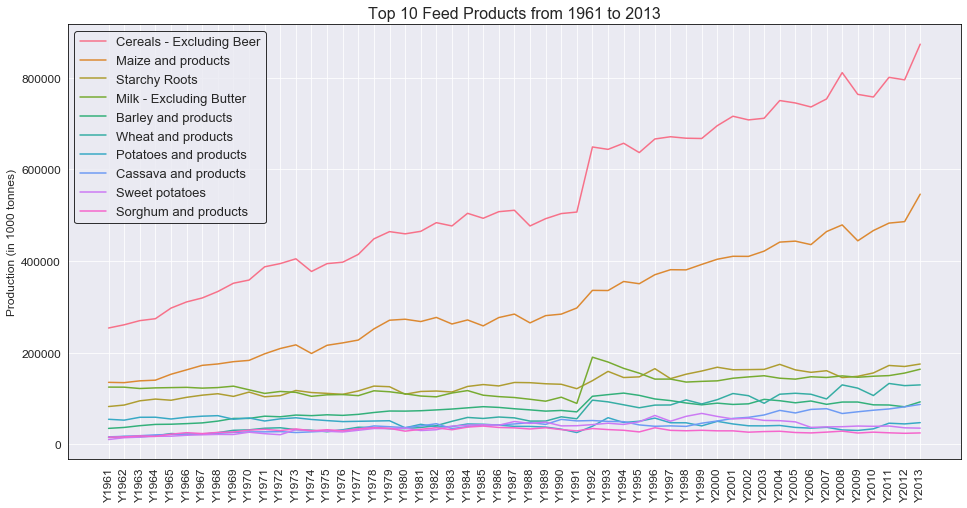

In [17]:
# Plot the yearly production trend for the top 10 feed productions globally
plot_yearly_product(feed, 'Feed')

**Results**: *Add interpretation here...*

Spike from 1991 to 1992 caused by Russian Federation? (refer to yearly production plot in section 3.1).

Are `vegetables` and `vegetables, other` similar enough to be combined? If so does this mean it is top product?

### 3.2.2 Analyzing the Top Food Products

With a majority of the food item production being focused in `Milk - Excluding Butter` and `Cereals - Excluding Beer`, we want to analyze this further and see which country is responsible for this product, as well as the yearly trend for the top 10 food items. This will allow us to see any yearly trends, as well as which food item has been dominant over the last 50 years. 

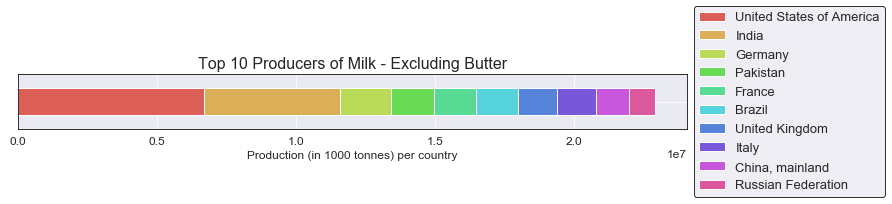

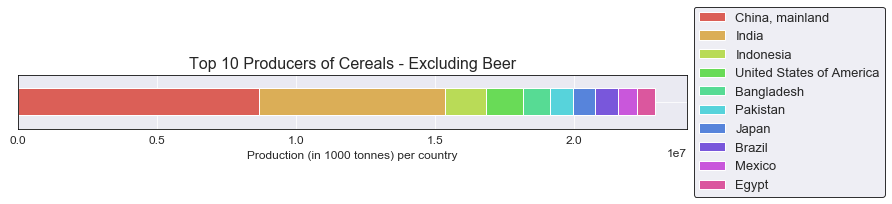

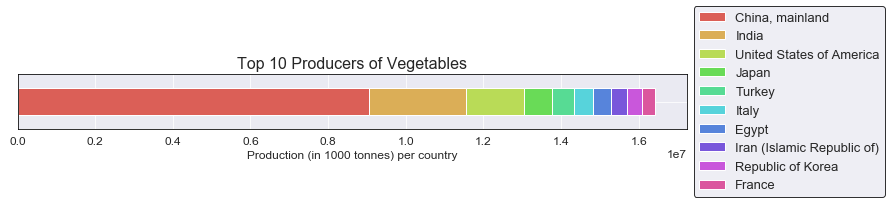

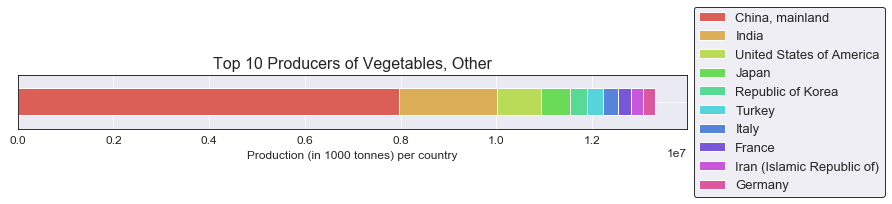

In [18]:
# Plot top 4 food products, partitioned by the top 10 countries
# Note: since only top 10 countries are included, the total production will 
#       be slightly lower than the above graphs. This is assuming that the 
#       top 10 countries will be responsible for most of the global production.

top_10_producers(food)

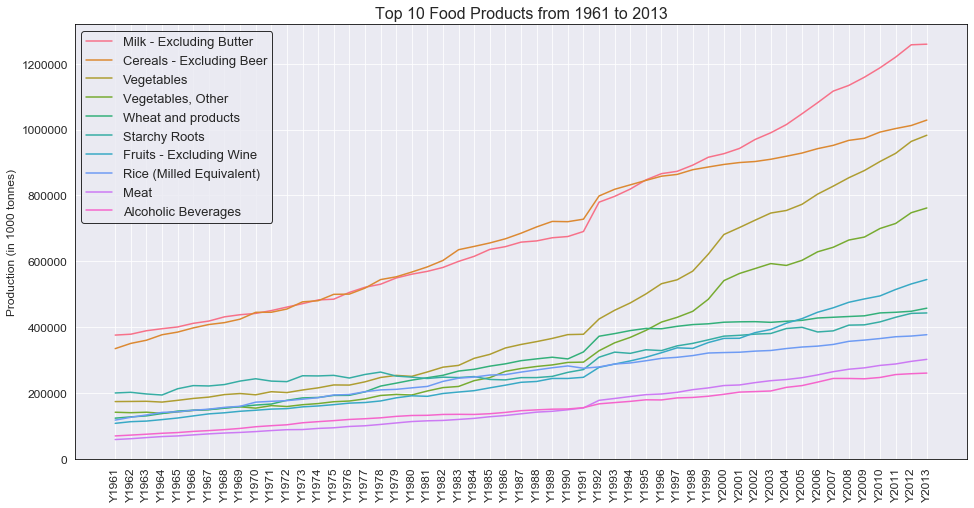

In [19]:
# Plot the yearly production trend for the top 10 food productions globally
plot_yearly_product(food, 'Food')

**Results**: *Add interpretation here...*

Spike from 1991 to 1992 caused by Russian Federation? (refer to yearly production plot in section 3.1).

Are `vegetables` and `vegetables, other` similar enough to be combined? If so does this mean it is top product?

<a id='section4'></a>

## 4. Population Exploration

### 4.1: Population compared to Production

Now that we've explored the production dataset, we want to analyze the population dataset and relate it back to that. To better understand our data, we will want to graph the yearly population from our dataset. With this graph, we will also want to overlay a line that shows the pattern of our data, determining if population is increasing exponentially or linearly.

Next, we will want to compare the yearly population to the yearly production, determining if there is a linear relationship between the global population and how much is produced. This will be useful in indicating wether or not we will be able to create a linear model in the `Modeling` notebook that can estimate the production needed for a given global population. (This will be used to determine the needed production to support the 2050 estimated population, if possible).

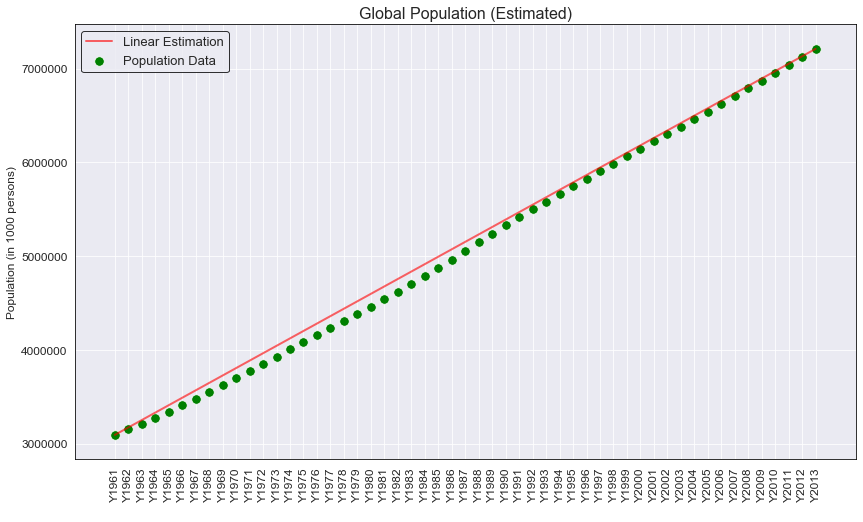

In [20]:
# Plot the global population per year
yearly_pop_with_line(pop)

**Results**: *Add interpretation here...*

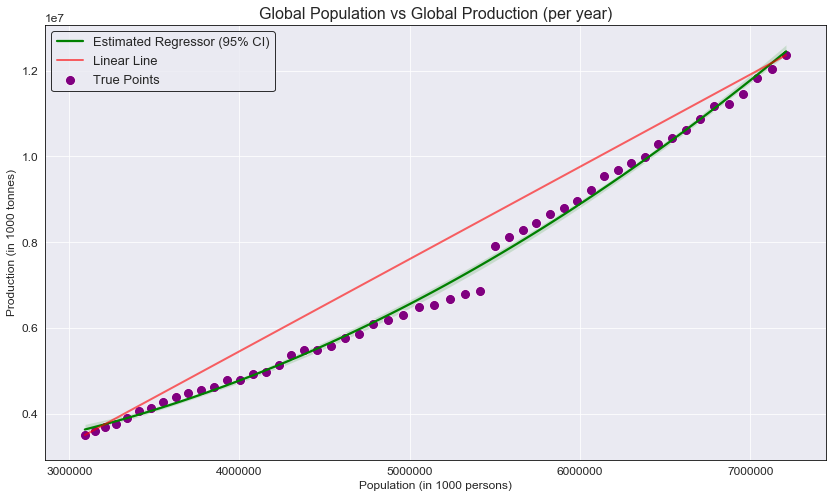

In [21]:
# Plot yearly population against yearly production
pop_vs_prod(data, pop)

**Results**: *Add interpretation here...*

Again, is the spike in production due to the Russian Federation?

Note that estimated regressor is using a second order linear model. Is there an exponential trend beginning?

### 4.2: Top producing countries population

Now, we will want to see the population trends for the countries that are responsible for the most production. From our analysis in [Section 3](#section3), we saw that the top 3 producing countries in order are: `China, mainland`, `United States of America`, and `India`. 

However, before we do this, we will also want to plot the highest populated countries to see if this correlates to the highest producing graph. Our analysis should answer the question: do the highest producing countries have the highest populations, or is a smaller population responsible for a majority of the global food? 

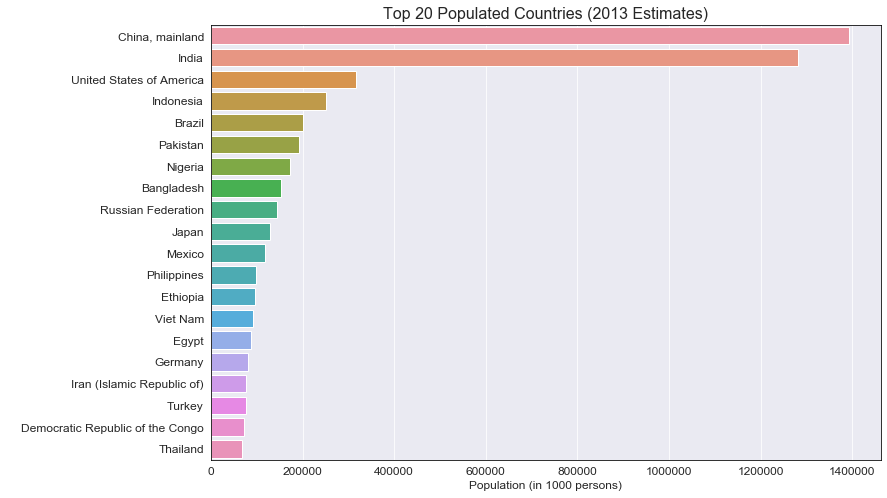

In [24]:
# Plot top 20 populated countries
plot_20_pop(pop)

**Results**: *Add interpretation here...*

Compare to [World Population Chart for 2013](https://www.worldometers.info/world-population/world-population-countries.php). Does it match our chart?

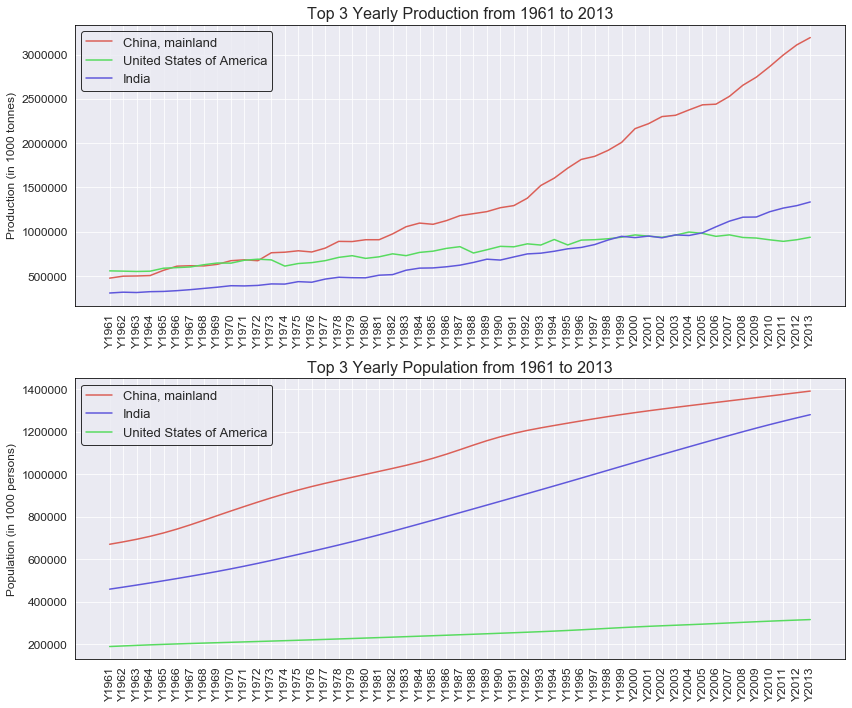

In [23]:
# Plot the yearly production and population over the last 50 years for the top 3 producing/populated countries
plot_top_prod_vs_pop(data, pop)

**Results**: *Add interpretation here...*

### 4.3 *To be filled in...*

<a id='section5'></a>

## 5. Russian Federation